## Importing necessary Tools

In [7]:
import pandas as pd
from sklearn.preprocessing import normalize
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

## Importing the Dataset

In [3]:
data=pd.read_csv('dataset/raw-data_recipe.csv')

In [4]:
data.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


# Visualization

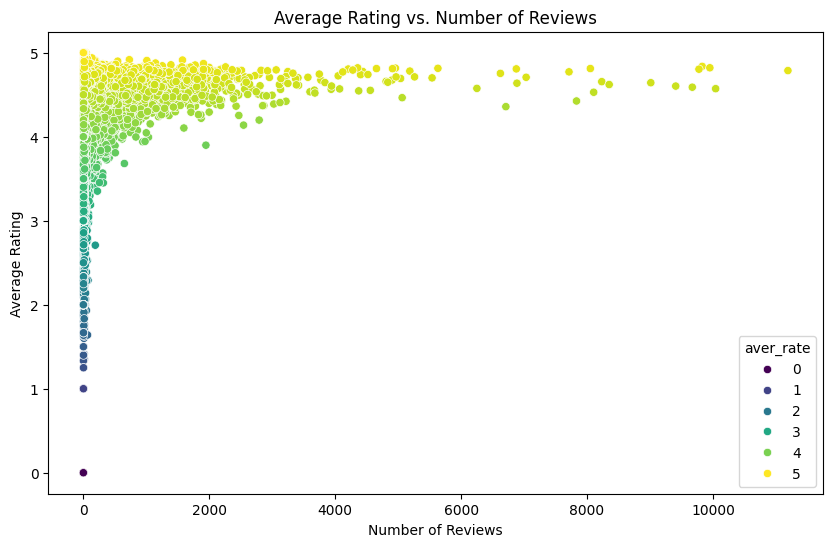

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_nums', y='aver_rate', data=data, hue='aver_rate', palette='viridis')
plt.title('Average Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

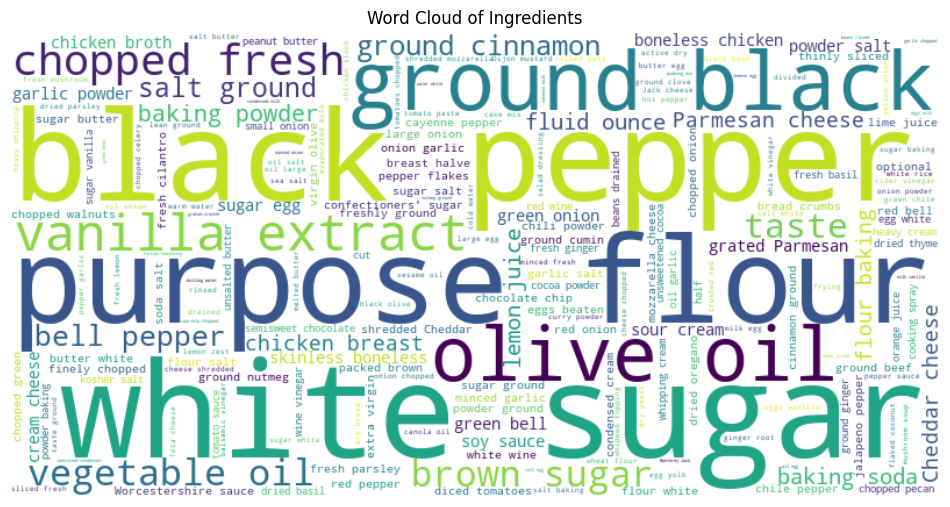

In [6]:
all_ingredients = ' '.join(data['ingredients'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_ingredients)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.show()


###### need extract the time for preparation and cooking time into minutes

In [8]:
def extract_time(directions):
    
    directions = str(directions)
    
   
    time_matches = re.findall(r'(\d+)\s*(m|h)', directions)
    
    prep_time = '0'
    cook_time = '0'
    
    
    for time, unit in time_matches:
        if 'Prep' in directions:
            prep_time = int(time)
            if unit == 'h':
                prep_time *= 60  
        if 'Cook' in directions:
            cook_time = int(time)
            if unit == 'h':
                cook_time *= 60  
    
    return pd.Series([prep_time, cook_time])


data[['prep_time', 'cook_time']] = data['cooking_directions'].apply(lambda x: extract_time(x))


data['prep_time'] = pd.to_numeric(data['prep_time'], errors='coerce')
data['cook_time'] = pd.to_numeric(data['cook_time'], errors='coerce')


print(data[['prep_time', 'cook_time']])


       prep_time  cook_time
0              8          8
1            180        180
2              5          5
3              5          5
4             10         10
...          ...        ...
49693          5          0
49694         15          0
49695          1          0
49696          5          5
49697         25         25

[49698 rows x 2 columns]


###### Heatmap of rating,review numbers, preperation time and cooking time

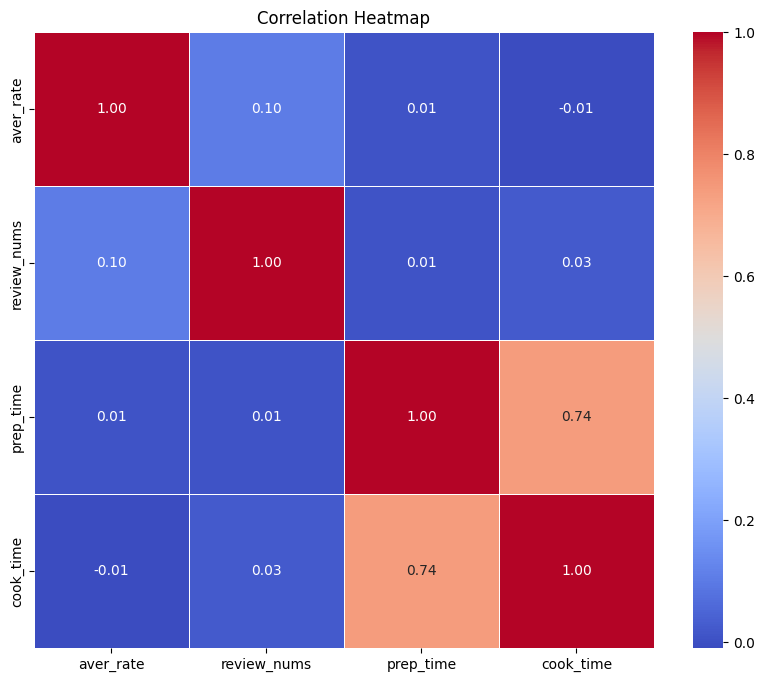

In [9]:

corr = data[['aver_rate', 'review_nums','prep_time', 'cook_time']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
data.isnull().sum()

recipe_id             0
recipe_name           0
aver_rate             0
image_url             0
review_nums           0
ingredients           0
cooking_directions    0
nutritions            0
reviews               0
prep_time             0
cook_time             0
dtype: int64

In [11]:
data['cooking_directions'][0]

"{'directions': u'Prep\\n5 m\\nCook\\n2 h 45 m\\nReady In\\n11 h 50 m\\nPreheat oven to 200 degrees F (95 degrees C).\\nSeason pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.\\nRemove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice.'}"

###### Top 50 recipes Based on the rating and fewest ingredients 

In [13]:
print(data.assign(ingredient_count=data['ingredients'].str.count('^') + 1).sort_values(by='ingredient_count').head(50)[['recipe_name']])

                                             recipe_name
0                                         Homemade Bacon
33125                            Luscious Lobster Bisque
33126                                 Everything Challah
33127  Grilled Potato Salad with Crazy Steve's Cajun ...
33128                               Mac's Shoe-Fly Bread
33129          Mississippi Sweet and Sour Barbeque Sauce
33130                             Philly Mashed Potatoes
33131                Iowa City Oatmeal Cookie (Cocktail)
33132                       Veggie-Bean Brunch Casserole
33133                  Homemade Vegetable Juice Cocktail
33124                                   Heavenly Halibut
33134                              Holiday Apricot Kugel
33136                                  Hurricane Carrots
33137                       Salted and Blackened Tilapia
33138             Cast Iron Skillet Buttermilk Cornbread
33139                          John's Buffalo Wing Sauce
33140                          

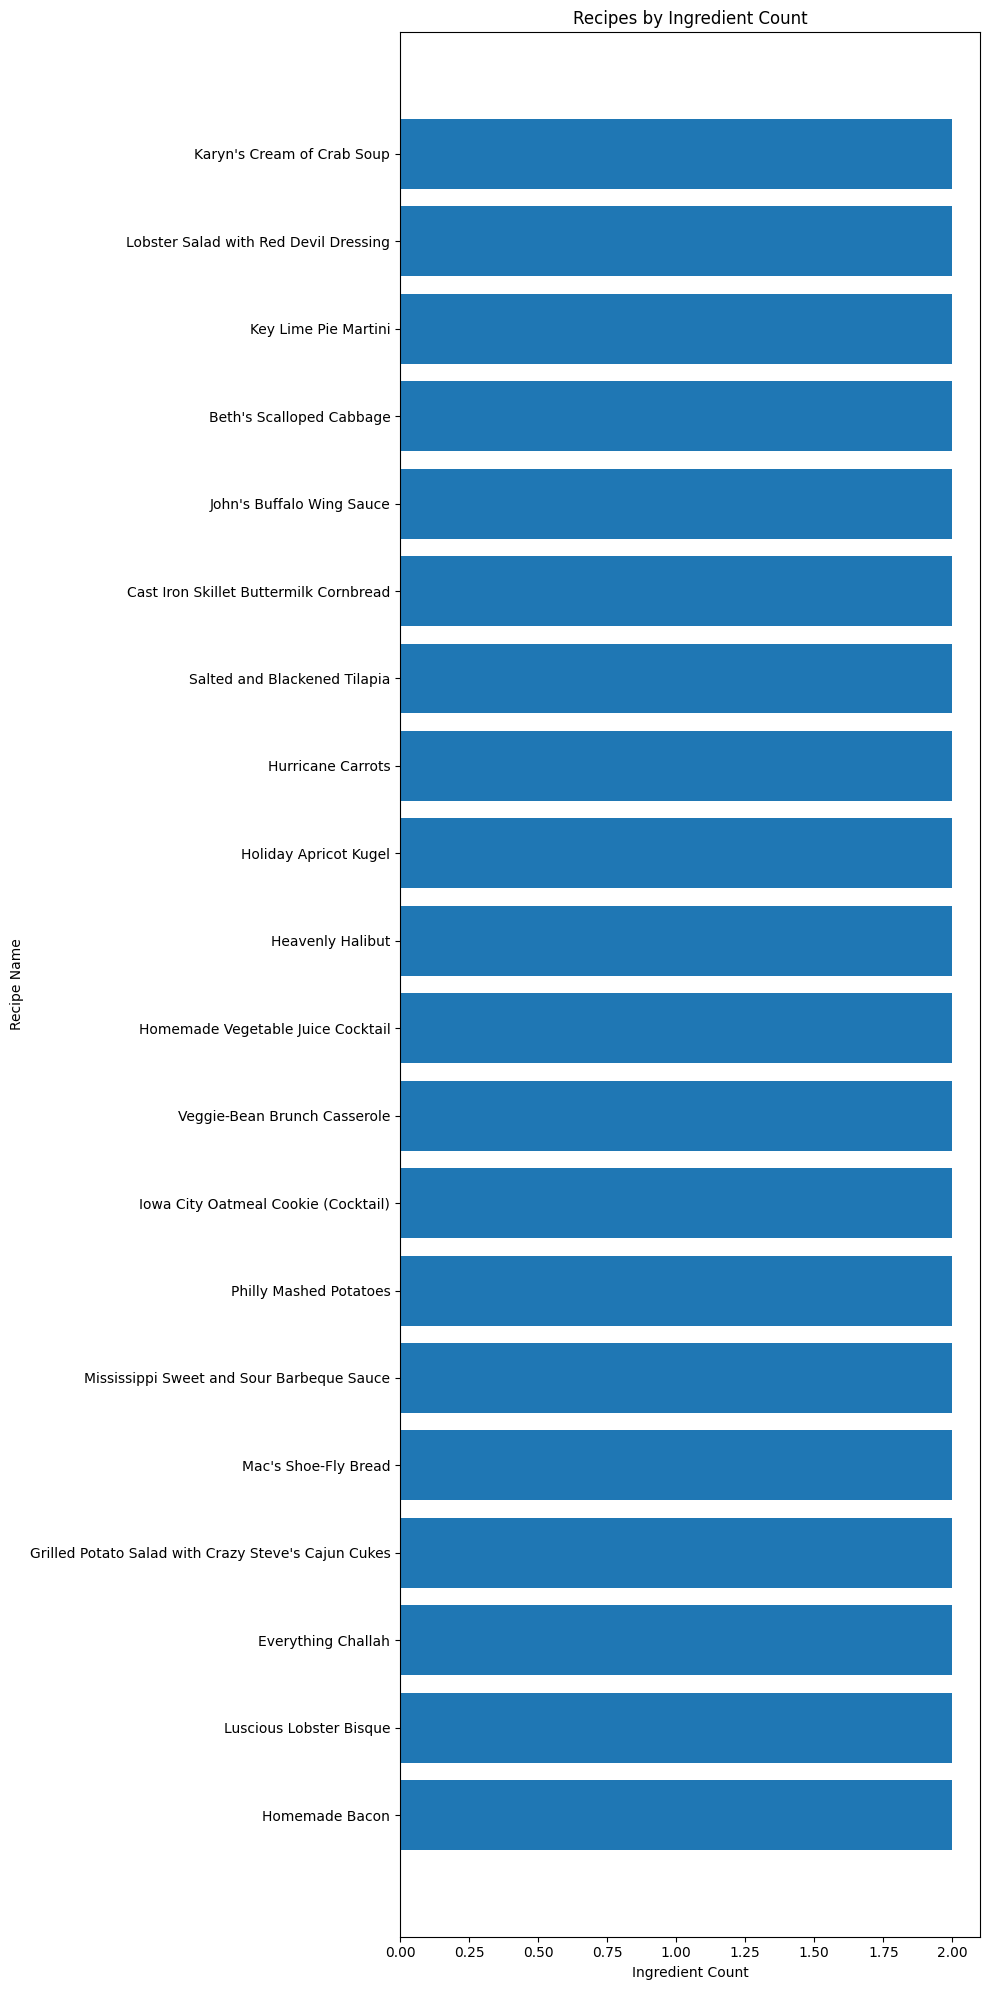

In [12]:
data['ingredient_count'] = data['ingredients'].str.count('^') + 1


df_sorted = data.sort_values(by='ingredient_count').head(20)


plt.figure(figsize=(10, 20))
plt.barh(df_sorted['recipe_name'], df_sorted['ingredient_count'])
plt.xlabel('Ingredient Count')
plt.ylabel('Recipe Name')
plt.title('Recipes by Ingredient Count')
plt.tight_layout()
plt.show()

## Preprocessing the Data

###### we don't have any use with the cooking_directions and reviews column in the dataset right now, so droping it will the best option

In [13]:
data=data.drop(columns=['cooking_directions','reviews','ingredient_count'])
data.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,nutritions,prep_time,cook_time
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,"{u'niacin': {u'hasCompleteData': False, u'name...",8,8
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,"{u'niacin': {u'hasCompleteData': False, u'name...",180,180
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,"{u'niacin': {u'hasCompleteData': True, u'name'...",10,10


###### Now we want to make the average_rating to a 2 decimal number.
###### For that we can create a function

In [14]:
def avg_rating(col):
    return f'{col:.2f}'

###### Apply the function to the aver_rate column in the dataset

In [15]:
data.aver_rate=data.aver_rate.apply(avg_rating)
data.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,nutritions,prep_time,cook_time
0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,"{u'niacin': {u'hasCompleteData': False, u'name...",8,8
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,"{u'niacin': {u'hasCompleteData': False, u'name...",180,180
2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5
3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5
4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,"{u'niacin': {u'hasCompleteData': True, u'name'...",10,10


In [16]:
data.dtypes

recipe_id       int64
recipe_name    object
aver_rate      object
image_url      object
review_nums     int64
ingredients    object
nutritions     object
prep_time       int64
cook_time       int64
dtype: object

###### The function will make the datatype to object so we need to convert it back to float

In [17]:
data.aver_rate=data.aver_rate.astype(float)
data.dtypes

recipe_id        int64
recipe_name     object
aver_rate      float64
image_url       object
review_nums      int64
ingredients     object
nutritions      object
prep_time        int64
cook_time        int64
dtype: object

###### We have the nutritions data as a string of dictionary

In [18]:
data.nutritions[0]

"{u'niacin': {u'hasCompleteData': False, u'name': u'Niacin Equivalents', u'amount': 9.319291, u'percentDailyValue': u'72', u'displayValue': u'9', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': True, u'name': u'Sugars', u'amount': 0.09355932, u'percentDailyValue': u'0', u'displayValue': u'0.1', u'unit': u'g'}, u'sodium': {u'hasCompleteData': True, u'name': u'Sodium', u'amount': 2017.13, u'percentDailyValue': u'81', u'displayValue': u'2017', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': True, u'name': u'Carbohydrates', u'amount': 1.797819, u'percentDailyValue': u'< 1', u'displayValue': u'1.8', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': False, u'name': u'Vitamin B6', u'amount': 0.2329798, u'percentDailyValue': u'15', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': True, u'name': u'Calories', u'amount': 308.1481, u'percentDailyValue': u'15', u'displayValue': u'308', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': False, u'name': u'Thiamin

###### so we have to convert it into a python dictionary

In [19]:
list_of_dict = []

for row in data.nutritions:
    list_of_dict.append(ast.literal_eval(row))
list_of_dict[1]

{'niacin': {'hasCompleteData': False,
  'name': 'Niacin Equivalents',
  'amount': 15.6016,
  'percentDailyValue': '120',
  'displayValue': '16',
  'unit': 'mg'},
 'sugars': {'hasCompleteData': False,
  'name': 'Sugars',
  'amount': 19.84146,
  'percentDailyValue': '0',
  'displayValue': '19.8',
  'unit': 'g'},
 'sodium': {'hasCompleteData': False,
  'name': 'Sodium',
  'amount': 2606.764,
  'percentDailyValue': '104',
  'displayValue': '2607',
  'unit': 'mg'},
 'carbohydrates': {'hasCompleteData': True,
  'name': 'Carbohydrates',
  'amount': 32.08176,
  'percentDailyValue': '10',
  'displayValue': '32.1',
  'unit': 'g'},
 'vitaminB6': {'hasCompleteData': False,
  'name': 'Vitamin B6',
  'amount': 1.328631,
  'percentDailyValue': '83',
  'displayValue': '1',
  'unit': 'mg'},
 'calories': {'hasCompleteData': True,
  'name': 'Calories',
  'amount': 371.7219,
  'percentDailyValue': '19',
  'displayValue': '372',
  'unit': 'kcal'},
 'thiamin': {'hasCompleteData': False,
  'name': 'Thiamin',

###### Now we have to extract percent daily values for some important  nutritions

In [20]:
calories_list = []
fat_list = []
carbohydrates_list = []
protein_list = []
cholesterol_list = []
sodium_list = []
fiber_list = []

###### Now iterate through every rows and list out the nutritions

In [21]:
for x in range(len(list_of_dict)):
    calories_list.append(list_of_dict[x]['calories']['percentDailyValue'])
    fat_list.append(list_of_dict[x]['fat']['percentDailyValue'])
    carbohydrates_list.append(list_of_dict[x]['carbohydrates']['percentDailyValue'])
    protein_list.append(list_of_dict[x]['protein']['percentDailyValue'])
    cholesterol_list.append(list_of_dict[x]['cholesterol']['percentDailyValue'])
    sodium_list.append(list_of_dict[x]['sodium']['percentDailyValue'])
    fiber_list.append(list_of_dict[x]['fiber']['percentDailyValue'])

###### Now group all the data into a single dataframe

In [22]:
nutritions_list = {'calories': calories_list, 'fat': fat_list, 'carbohydrates': carbohydrates_list, 
       'protein': protein_list, 'cholesterol': cholesterol_list, 'sodium': sodium_list, 
       'fiber': fiber_list}

In [23]:
df=pd.DataFrame(nutritions_list)

###### We can make this index as the recipes index

In [24]:
df.index=data['recipe_id']
df.head()

,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
recipe_id,,,,,,,
222388,15,36,< 1,42,21,81,2
240488,19,18,10,73,33,104,41
218939,17,36,2,48,24,31,4
87211,32,45,20,65,20,43,18
245714,8,12,5,14,7,8,3


In [25]:
df.isnull().sum()

calories         963
fat              963
carbohydrates    963
protein          963
cholesterol      963
sodium           963
fiber            963
dtype: int64

###### We can see that there are some missing values in these data. which maybe the recipes which does not have these Nutritions ,so we want to drop it

In [26]:
df=df.dropna()

In [27]:
df.isnull().sum()

calories         0
fat              0
carbohydrates    0
protein          0
cholesterol      0
sodium           0
fiber            0
dtype: int64

###### We can see that there are values which is less than 1 and it shows up as an object col
###### Convert those into 1 and others as same
###### For that we can create a function called text_cleaning

In [28]:
def text_cleaning(cols):
    if cols == '< 1':
        return 1
    else:
        return cols

for col in df.columns:
    df[col] = df[col].apply(text_cleaning)

In [29]:
df.head()

,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
recipe_id,,,,,,,
222388,15,36,1,42,21,81,2
240488,19,18,10,73,33,104,41
218939,17,36,2,48,24,31,4
87211,32,45,20,65,20,43,18
245714,8,12,5,14,7,8,3


In [30]:
df.dtypes

calories         object
fat              object
carbohydrates    object
protein          object
cholesterol      object
sodium           object
fiber            object
dtype: object

###### We can see that the datatypes of all the columns are object
###### Convert those into numerics

In [31]:
df=df.apply(pd.to_numeric)

In [32]:
df.dtypes

calories         int64
fat              int64
carbohydrates    int64
protein          int64
cholesterol      int64
sodium           int64
fiber            int64
dtype: object

In [33]:
df['sodium'].unique()

array([  81,  104,   31,   43,    8,   52,   67,   11,   16,   47,   17,
         56,   58,   85,   21,   70,   29,   20,   18,   19,   33,   48,
         42,   46,   53,   95,   10,   35,   39,   23,   63,  122,   57,
         22,   30,  112,    6,   28,   74,   50,   34,   44,    4,    7,
          5,    3,   12,   32,   14,   87,   59,   27,   25,  120,  106,
        103,   38,   24,    1,   88,   64,  107,  121,   41,   36,   45,
         15,   37,   55,   13,    9,  109,   26,   51,   49,  117,   78,
         65,  128,   68,   75,   62,   54,   66,   69,  293,    2,   40,
         96,   84,  320,   76,   77,   72,   60,   90,  217,   83,   89,
        183,   98,  123,  178,   86,  101,  141,   71,   73,  298,   93,
        142,   61,  110,   80,  108,   92,  131,  157,  113,  119,  195,
         91,  127,   79,   99,  146,   97,  126,  334,  185,  100,   94,
        188,  227,  129,  136,  164,  171,  111,  125,  137,  102,  143,
         82,  105,  748,  162,  198,  132,  134,  5

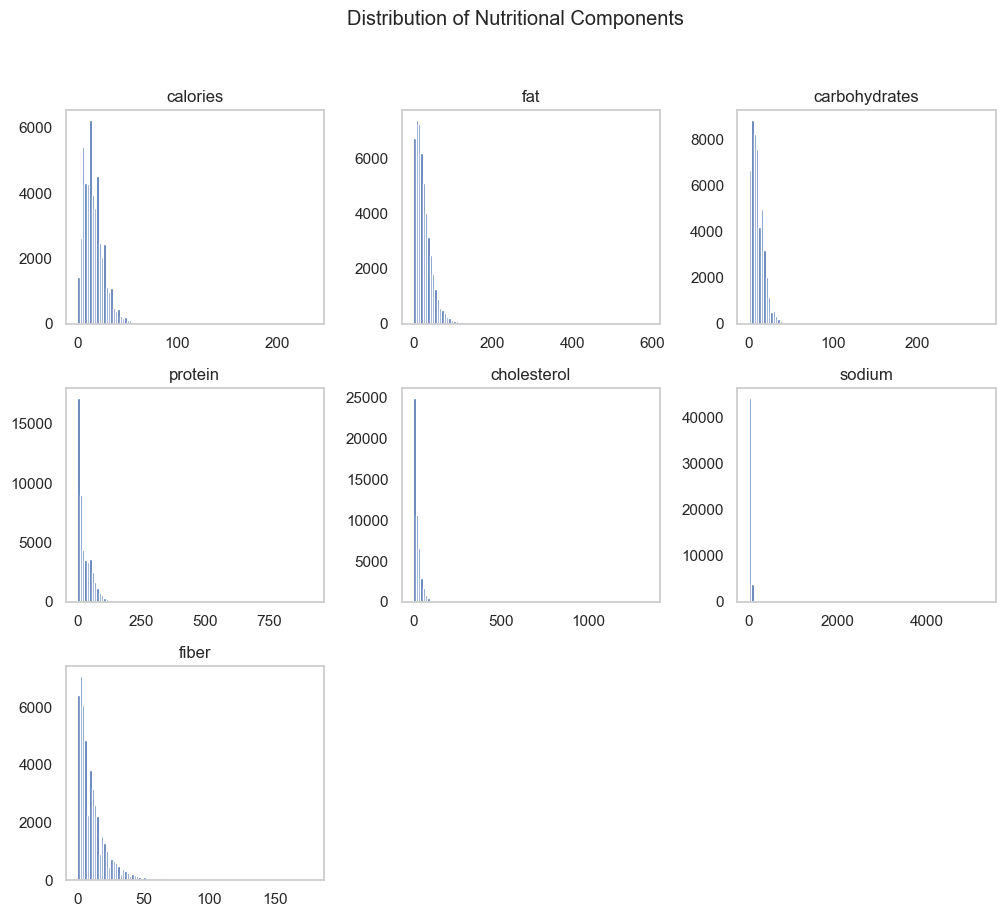

In [34]:
sns.set(style="whitegrid")


df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']].hist(bins=100, figsize=(12, 10), grid=False)
plt.suptitle('Distribution of Nutritional Components')
plt.show()

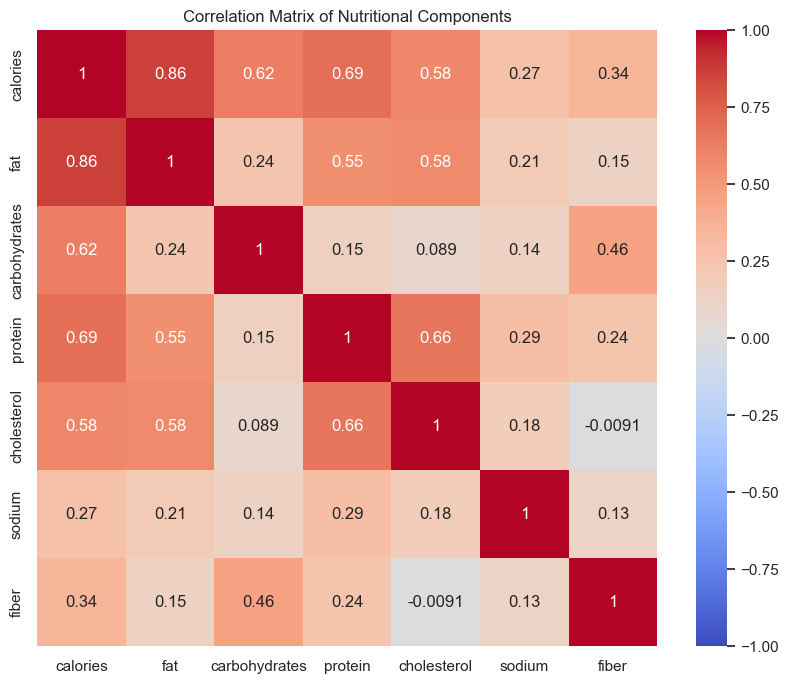

In [35]:

correlation_matrix = df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nutritional Components')
plt.show()


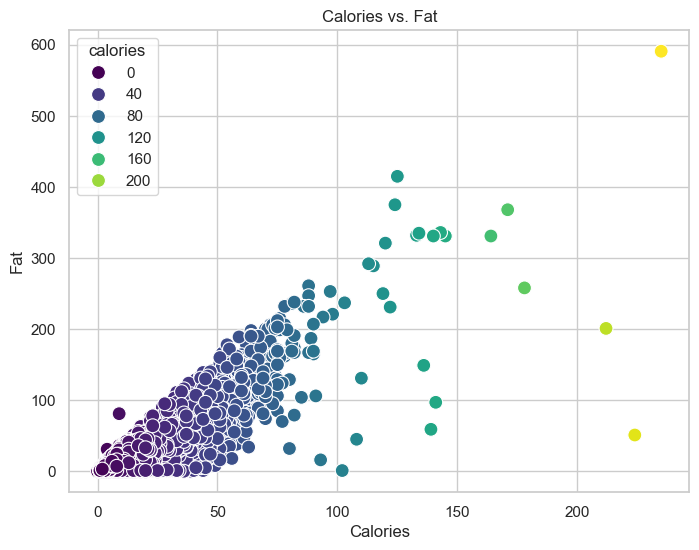

In [37]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='calories', y='fat', hue='calories', palette='viridis', s=100)
plt.title('Calories vs. Fat')
plt.xlabel('Calories')
plt.ylabel('Fat')
plt.show()




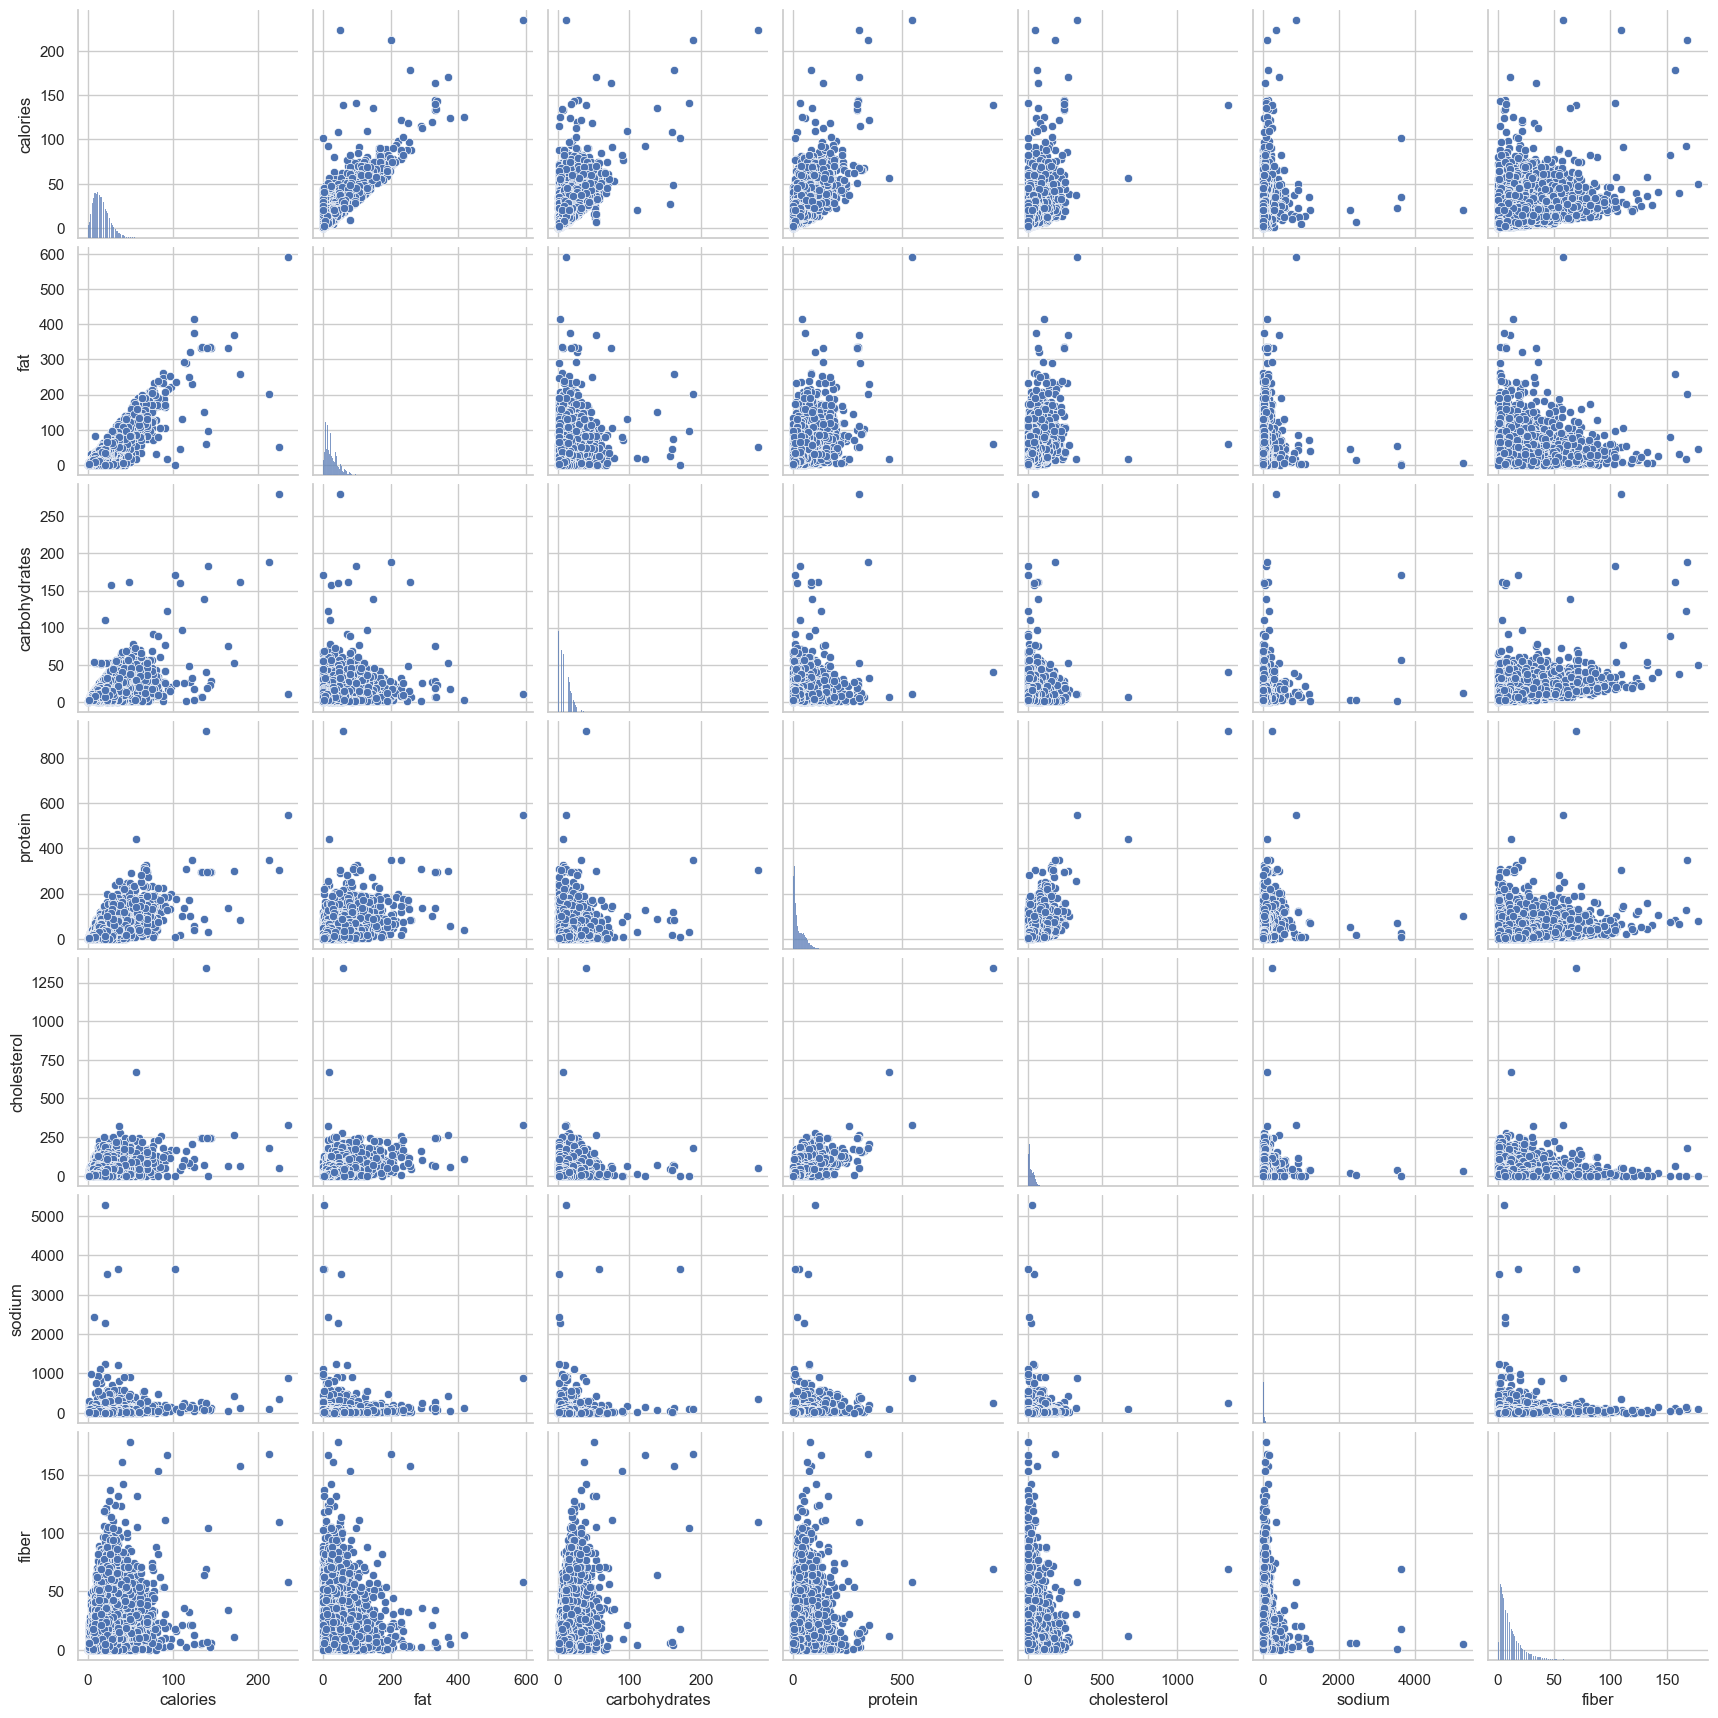

In [38]:
sns.pairplot(df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']])
plt.show()


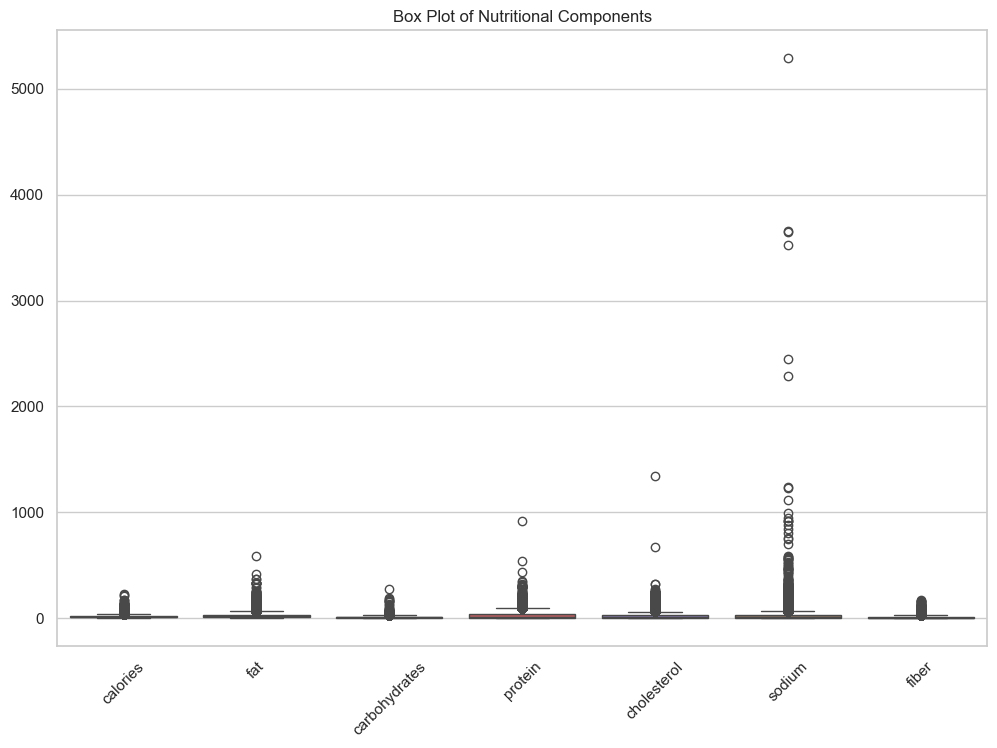

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['calories', 'fat', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'fiber']])
plt.title('Box Plot of Nutritional Components')
plt.xticks(rotation=45)
plt.show()


###### Now we can Normalize all the columns

In [40]:
df_normalized = pd.DataFrame(normalize(df, axis=0))
df_normalized.columns = df.columns
df_normalized.index = df.index
df_normalized.head()

,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
recipe_id,,,,,,,
222388,0.003457,0.004775,0.000352,0.004739,0.002997,0.006572,0.000560
240488,0.004378,0.002387,0.003517,0.008236,0.004710,0.008438,0.011477
218939,0.003917,0.004775,0.000703,0.005416,0.003425,0.002515,0.001120
87211,0.007374,0.005969,0.007034,0.007334,0.002855,0.003489,0.005039
245714,0.001844,0.001592,0.001759,0.001580,0.000999,0.000649,0.000840


###### Now we need to add the name of the recipe and the recipe_id 

In [41]:
def selected_recipe(recipe_id):

    recipe_df=data.set_index('recipe_id')
    recipe_name=recipe_df.at[recipe_id,'recipe_name']
    print("Recipe ID:", recipe_id)
    print("Recipe Name:", recipe_name)
    print(df.loc[df.index.isin([recipe_id])].transpose())
selected_recipe(87211)
    

Recipe ID: 87211
Recipe Name: Chicken Pesto Paninis
recipe_id      87211
calories          32
fat               45
carbohydrates     20
protein           65
cholesterol       20
sodium            43
fiber             18


In [42]:
final_recipe_dataset=pd.merge(data,df,on='recipe_id')
final_recipe_dataset.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,nutritions,prep_time,cook_time,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber
0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,"{u'niacin': {u'hasCompleteData': False, u'name...",8,8,15,36,1,42,21,81,2
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,"{u'niacin': {u'hasCompleteData': False, u'name...",180,180,19,18,10,73,33,104,41
2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5,17,36,2,48,24,31,4
3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5,32,45,20,65,20,43,18
4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,"{u'niacin': {u'hasCompleteData': True, u'name'...",10,10,8,12,5,14,7,8,3


In [43]:
final_recipe_dataset['ingredients'][2]

'chicken wings^sprigs rosemary^head garlic^olive oil^lemon pepper^seasoned salt'

In [44]:
final_recipe_dataset.dtypes

recipe_id          int64
recipe_name       object
aver_rate        float64
image_url         object
review_nums        int64
ingredients       object
nutritions        object
prep_time          int64
cook_time          int64
calories           int64
fat                int64
carbohydrates      int64
protein            int64
cholesterol        int64
sodium             int64
fiber              int64
dtype: object

###### The ingredients list is in an String form so we need to make it to a list

In [45]:
ingredients_list = []

for x in range(len(final_recipe_dataset)):
    ingredients_list.append(final_recipe_dataset['ingredients'][x].split('^'))
data2={'ingredients_list':ingredients_list}
df1=pd.DataFrame(data2)
df1.index=final_recipe_dataset['recipe_id']
df1.head()

,ingredients_list
recipe_id,
222388,"[pork belly, smoked paprika, kosher salt, grou..."
240488,"[sauerkraut drained, Granny Smith apples slice..."
218939,"[chicken wings, sprigs rosemary, head garlic, ..."
87211,"[focaccia bread quartered, prepared basil pest..."
245714,"[red potatoes, strips bacon, Sauce:, heavy whi..."


###### Now merge this to the Original dataset

In [46]:
final_recipe_dataset=pd.merge(final_recipe_dataset,df1,on='recipe_id')
final_recipe_dataset.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,nutritions,prep_time,cook_time,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,"{u'niacin': {u'hasCompleteData': False, u'name...",8,8,15,36,1,42,21,81,2,"[pork belly, smoked paprika, kosher salt, grou..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,"{u'niacin': {u'hasCompleteData': False, u'name...",180,180,19,18,10,73,33,104,41,"[sauerkraut drained, Granny Smith apples slice..."
2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5,17,36,2,48,24,31,4,"[chicken wings, sprigs rosemary, head garlic, ..."
3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,"{u'niacin': {u'hasCompleteData': True, u'name'...",5,5,32,45,20,65,20,43,18,"[focaccia bread quartered, prepared basil pest..."
4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,"{u'niacin': {u'hasCompleteData': True, u'name'...",10,10,8,12,5,14,7,8,3,"[red potatoes, strips bacon, Sauce:, heavy whi..."


###### Now we have the both the nutritions and ingredients_list, we can revome the parent columns that was used to derive these two things and also the image_url

In [47]:
final_dataset=final_recipe_dataset.drop(['ingredients','nutritions','image_url'],axis=1)

In [48]:
final_dataset.head()

,recipe_id,recipe_name,aver_rate,review_nums,prep_time,cook_time,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,222388,Homemade Bacon,5.00,3,8,8,15,36,1,42,21,81,2,"[pork belly, smoked paprika, kosher salt, grou..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,29,180,180,19,18,10,73,33,104,41,"[sauerkraut drained, Granny Smith apples slice..."
2,218939,Foolproof Rosemary Chicken Wings,4.57,12,5,5,17,36,2,48,24,31,4,"[chicken wings, sprigs rosemary, head garlic, ..."
3,87211,Chicken Pesto Paninis,4.62,163,5,5,32,45,20,65,20,43,18,"[focaccia bread quartered, prepared basil pest..."
4,245714,Potato Bacon Pizza,4.50,2,10,10,8,12,5,14,7,8,3,"[red potatoes, strips bacon, Sauce:, heavy whi..."


In [49]:
final_dataset.shape

(48735, 14)

In [50]:
final_dataset.dtypes

recipe_id             int64
recipe_name          object
aver_rate           float64
review_nums           int64
prep_time             int64
cook_time             int64
calories              int64
fat                   int64
carbohydrates         int64
protein               int64
cholesterol           int64
sodium                int64
fiber                 int64
ingredients_list     object
dtype: object

In [51]:
final_dataset['ingredients_list'][1]

['sauerkraut drained',
 'Granny Smith apples sliced',
 'large onion',
 'caraway seeds',
 'apple cider divided',
 'brown sugar',
 'Rub:',
 'Thai seasoning',
 'salt',
 'garlic powder',
 'ground black pepper',
 'boneless pork loin roast']

In [59]:
final_dataset.to_csv('final_dataset.csv')